In [1]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

l=glob.glob("dat/*.dat")
#os.mkdir("indiv_dmdt")

maxval = 255

dmints = [-8,-5,-3,-2.5,-2,-1.5,-1,-0.5,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.5,1,1.5,2,2.5,3,5,8]
dtints = [0.0,1.0/145,2.0/145,3.0/145,4.0/145,1.0/25,2.0/25,3.0/25,1.5,2.5,3.5,4.5,5.5,7,10,20,30,60,90,120,240,600,960,2000,4000]

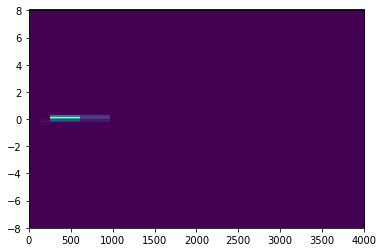

In [2]:
for q in range(144572,150000):
    df=pd.read_table(l[q],header=None,delim_whitespace=True)
    mjd=pd.Series.as_matrix(df[0])
    mag=pd.Series.as_matrix(df[1])
    lcid=list(set(pd.Series.as_matrix(df[5])))[0]
    (smjd,smag) = list(zip(*sorted(list(zip(mjd,mag)))))
    #dmdt=np.zeros(shape=(len(dmints)-1,len(dtints)-1))
    maxpts = (len(mjd)*(len(mjd)-1))/2
    dmjd = []
    dmag = []

    # generate differences (w.r.t. time and mags)
    for i in range(len(mjd)):
        for j in range(i+1,len(mjd)):
            dmjd.append(mjd[j]-mjd[i])
            dmag.append(mag[j]-mag[i])

    # sort w.r.t. to first component (dmjd)
    (sdmjd,sdmag) = list(zip(*sorted(list(zip(dmjd,dmag)))))
        
    h=plt.hist2d(sdmjd,sdmag,bins=[dtints,dmints])
    dmdt=h[0]
    dmdt=np.transpose(dmdt)
    dmdt=(maxval*dmdt/maxpts+0.99999).astype(int)
        
    np.save("indiv_dmdt/"+lcid,dmdt)
    
    